In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt



In [2]:
#Loading Data
data = pd.read_csv("exams.csv")

print(data.shape)
data.head()

(100, 3)


,exam_1,exam_2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.describe()

,exam_1,exam_2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [4]:
#Min Max Normalization
birinci_normalized=(data["exam_1"]-min(data["exam_1"]))/(max(data["exam_1"])-min(data["exam_1"]))
ikinci_normalized=(data["exam_2"]-min(data["exam_2"]))/(max(data["exam_2"])-min(data["exam_2"]))


data["exam_1"]=birinci_normalized
data["exam_2"]=ikinci_normalized

In [5]:
data.describe()

,exam_1,exam_2,admitted
count,100.000000,100.000000,100.000000
mean,0.510046,0.521763,0.600000
std,0.278895,0.272211,0.492366
min,0.000000,0.000000,0.000000
25%,0.298996,0.257462,0.000000
50%,0.529951,0.543155,1.000000
75%,0.718853,0.714224,1.000000
max,1.000000,1.000000,1.000000


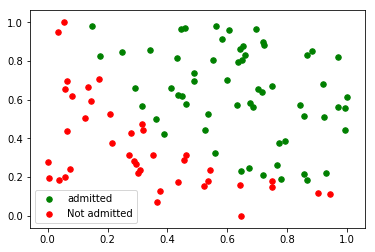

In [6]:
#Visualization Part 1
passed = data[data['admitted'] == 1] 
fail = data[data['admitted'] == 0] 


plt.scatter(passed['exam_1'], passed['exam_2'], s=30, c='g', marker='o', label='admitted')
plt.scatter(fail['exam_1'], fail['exam_2'], s=30, c='r', marker='o', label='Not admitted')
plt.legend()
plt.show()

In [7]:
#dependent and independent 
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values



In [8]:
#Sigmoid Function

def sigmoid(x):
    
    return 1/(np.exp(-x) + 1)


In [9]:
#Cost Function
def cost_function(x, y, T):
    m = x.shape[0]
    hip = sigmoid(np.dot(x, T))
    c= -1/m*(y*np.log(hip) + (1 - y)*np.log(1 - hip)).sum()
    
    return c

In [10]:
#Gradient function and iterations
def grad(x, y, alpha, iterations):
    T = np.ndarray(3)
    c = []
    m = len(x)
    x = np.append(x, np.ones((m, 1)), axis=1)
  
    for iteration in range(iterations):
        hip = sigmoid(np.dot(x, T))
        T = T - alpha*np.dot(x.transpose(), hip - y)/m
        c.append(cost_function(x, y, T))
        
    return T, c


In [13]:

T, c = grad(x, y, 0.01, 100000)

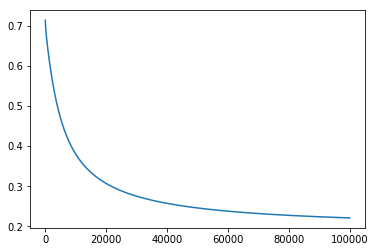

In [14]:
#Visualization part 2
#Cost vs Iteration
plt.figure()
plt.plot(c)
plt.show()

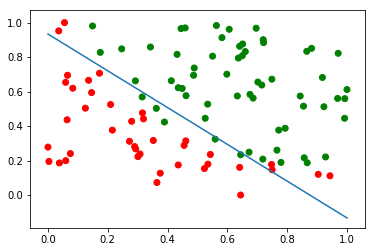

In [15]:
# first exam score vs second exam score AND  decision boundary

bir=data['exam_1']
iki=data['exam_2']
predict=data['admitted']
col = []
for i in predict.iteritems():
    if i[1] == 0: col.append("red")
    else: col.append("green")
        
plt.scatter(bir, iki, c=col)
plt.plot([0, 1], [-T[2]/T[1], -(T[2] + T[0])/T[1]])
plt.show()


In [17]:
#Testing 

from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv("exams.csv")
MinMax = MinMaxScaler()
data[["exam_1", "exam_2"]] = MinMax.fit_transform(data[["exam_1", "exam_2"]])
test = pd.DataFrame({"exam_1": [55, 40], "exam_2": [70, 60], "admitted": [1, 0]})
test_x = test[["exam_1", "exam_2"]].values
test_x = test[["exam_1", "exam_2"]].values
test_x = MinMax.transform(test_x)
test_x = np.append(test_x, np.ones((2, 1)), axis=1)
test["prob"] = sigmoid(np.dot(test_x, T))
test["prediction"] = round(test["prob"])
test.head(2)




,exam_1,exam_2,admitted,prob,prediction
0,55,70,1,0.553432,1.0
1,40,60,0,0.044314,0.0


In [18]:
examonetwo=data[["exam_1", "exam_2"]].values
predicted=data["admitted"].values


In [19]:
#Accuracy Result
from sklearn.metrics import accuracy_score
test_x = examonetwo
test_x = np.append(test_x, np.ones((test_x.shape[0], 1)), axis=1)
H=sigmoid(np.dot(test_x,T))

data["probexam"] = H
Z=round(data["probexam"])
data["passfail"] = Z
result = accuracy_score(data["admitted"], data["passfail"])*100
print("Accuracy result:",result,'%' )


Accuracy result: 89.0 %


In [20]:
#sklearn regularization
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
data = pd.read_csv("exams.csv")
lreg = LogisticRegression(penalty='l2', C=1) 
x = data[["exam_1", "exam_2"]].values
y = data["admitted"].values

lreg.fit(x, y)
result=lreg.score(x, y)*100

In [21]:
#Accuracy Testing
print("Accuracy result : ",result,'%')


Accuracy result :  87.0 %


In [25]:
#Testing with values
bir=data['exam_1']
iki=data['exam_2']
predict=data['admitted']

#train
X_train=np.array([bir,iki])
X_train=X_train.transpose()

#test
x_test=[[55,70],[40,60]]
y_test=[[1],[0]]


lreg.fit(X_train,predict)
prob = lreg.predict_proba(x_test)[1]

print(prob)

ypredict=lreg.predict(x_test)

print(ypredict)



[0.62266437 0.37733563]
[1 0]
